In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("iris.data",header=None)

In [7]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:

class Perceptron(object):
    """
    params:
    --------------
    float eta: 学習率
    int n_iter: エポック
    int random_state: 重みを初期化するための乱数シード
    --------------
    
    属性:
    --------------
    w_: 1次元配列
        適合後の重み
    errors_: リスト
             各エポックでの誤分類(更新)の数
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """
        params:
        --------------
        X: {配列のようなデータ構造}, shape = {num_samples, num_features}
            トレーニングデータ
        y: 配列のようなデータ構造, shape = {num_samples}
            目的変数
        
        戻り値:
        --------------
        self: object
        """
        #w_は0か値の小さい乱数で初期化する
        random = np.random.RandomState(self.random_state)
        self.w_ = random.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                #重みw1, ... , wmの更新
                #Δwj = {eta * (y(i) - y^(i)} * x(i)j
                #{}内をupdateと置く
                #一個一個のupdateなのでpredictの引数が1次元
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                #重みw0の更新: Δw0 = eta*(y(i) - y^(i))
                self.w_[0] += update
                #誤分類の数の集計
                #重みの更新が0でないの時は誤分類とする
                errors += int(update != 0.0)
            #反復ごとに誤差を格納
            self.errors_.append(errors)
        
        return self
    
    def net_input(self, X):
        #y = dot(X, w) + w0 
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        #1ステップ後のラベルを返す
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [9]:
X = df.iloc[0:100, [0,2]].values #0番目と2番目を抽出
y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)

In [10]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    #マーカとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #プロットの準備
    x1min, x1max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2min, x2max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, resolution),
                           np.arange(x2min, x2max, resolution))
    
    #各特徴量を1次元配列に変換して予測を実行
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    h = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, h, alpha=0.3, cmap=cmap)
    #軸
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

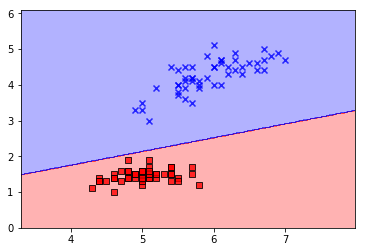

In [11]:
plot_decision_regions(X, y, classifier = ppn)

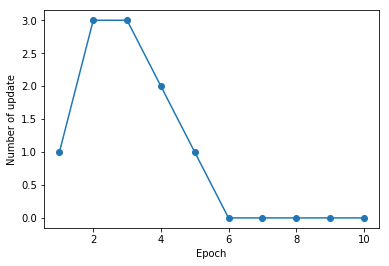

In [12]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of update')
plt.show()

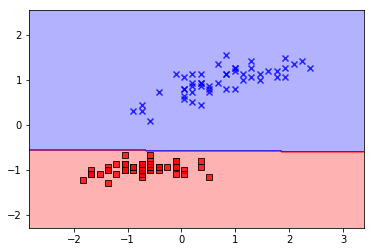

In [13]:
#standardization

X_std = np.copy(X)
X_std[:, 0] = (X[:, 0]-X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1]-X[:, 1].mean()) / X[:, 1].std()
ppn.fit(X_std, y)
plot_decision_regions(X_std, y, classifier = ppn)

In [20]:
import numpy as np
class LogsticRegression(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """
        perceptron との違いは活性化関数が存在する点、重みの更新の点の方法（活性化関数による）
        """
        
        random = np.random.RandomState(self.random_state)
        self.w_ = random.normal(loc=0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        #np.clip(x, max, min): 
        #z: 処理する配列
        #max, min: 処理後の値の最大値、最小値
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

TypeError: Invalid parameters passed: {'random': 1, 'startify': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])}

C:\Users\masan\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


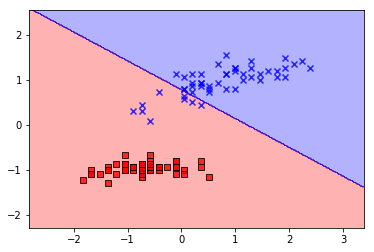

In [24]:
lr = LogsticRegression(n_iter=1000)
lr.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=lr)